# 0. Initiate

## Paths

In [6]:
# Global paths

# Raw data
mimic_iv_path = '/n/scratch/users/a/ays124/mimiciv/'
icu_stays_path = mimic_iv_path + 'icu/icustays.csv.gz'
chart_events_path = mimic_iv_path + 'icu/chartevents.csv.gz'
patients_table_path = mimic_iv_path + 'hosp/patients.csv.gz'
admissions_table_path = mimic_iv_path + 'hosp/admissions.csv.gz'
lab_events_path = mimic_iv_path + 'hosp/labevents.csv.gz'

mimic_cxr_path = '/n/scratch/users/a/ays124/mimic-cxr-jpg/'
cxr_records_path = mimic_cxr_path + 'cxr-record-list.csv.gz'
cxr_metadata_path = mimic_cxr_path + 'mimic-cxr-2.0.0-metadata.csv.gz'
df_split_path = mimic_cxr_path + 'mimic-cxr-2.0.0-split.csv.gz'
negbio_path = mimic_cxr_path + 'mimic-cxr-2.0.0-negbio.csv.gz'
chexpert_path = mimic_cxr_path + 'mimic-cxr-2.0.0-chexpert.csv.gz'



# Features intermediate 
feature_folder = 'CardiomegalyBiomarkers/Cardiomegaly_Classification/MIMIC_features_OG/'

# MIMIC intermediate 
relevant_chart_events_save_path = feature_folder + 'RelevantChartEvents.pkl'
relevant_lab_events_save_path = feature_folder + 'RelevantLabEvents.pkl'
df_icu_xray_path =  feature_folder + 'IcuXrayMatched.pkl'

# Biomarkers
ctr_path =  '/home/ays124/mimic/CardiomegalyBiomarkers/ctr-cpar-cardiomegaly/CTRs.csv'
cpar_path = '/home/ays124/mimic/CardiomegalyBiomarkers/ctr-cpar-cardiomegaly/CPARs.csv'

# Final cleaned features
features_path = feature_folder + 'MIMIC_features_OG.pkl'

##  Parameters

In [3]:
# General Parameters
label = 'Cardiomegaly'  # Define label of target disease ('Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices')
chunk_size = 10**7      # When extracting relevant lab and chart events we iterate through the original files in chunks of size 'chunk_size'.

# MIMIC-CXR (imaging) Parameters
view = 'PA'     # Choose the X-ray view position you're interested in, AP or PA

# MIMIC-IV (non-imaging) Parameters
MIMIC_IV_version = 2            # Version of MIMIC-IV downloaded
days_before_icu = 365           # The number of days before ICU admission that we look for x-rays in
xray_gap_after_icu = 0          # You can choose to include a 'gap' after ICU discharge in which you don't look for any X-rays
xray_max_time_after_icu = 90    # If you don't want a gap, xray_max_time_after_icu is just the number of days after ICU discharge that we look for x-rays in. We look for x-rays which are between Gap and Gap + xray_max_time_after_icu days after out-time
average_by = 'Stay'             # 'Hourly' to average readings every hour and have one hour per row; 'Stay', to average chart and lab values across a stay
filter_col = 'itemid'   	    # Define features to use for time-series prep

In [4]:
# Labels of desiered non-imaging features

# Lables
chart_labels_mean = {
    220045: 'HR_mean',
    220277: 'SpO2_mean',
    223761: 'Temp(F)_mean',
    220210: 'RR_mean',
    220052: 'ABPm_mean',
    220051: 'ABPd_mean',
    220050: 'ABPs_mean',
    220180: 'NBPd_mean',
    220181: 'NBPm_mean',
    220179: 'NBPs_mean',
    223835: 'FiO2_mean',
    220274: 'PH_mean',
    220235: 'PCO2_mean',
    220227: 'SaO2_mean',
    227457: 'PlateletCount_mean',
    227456: 'Albumin_mean',
    220603: 'Cholesterol_mean',
    220645: 'Sodium_mean',
    220224: 'PO2_mean',
}

chart_labels_max = {
    220045: 'HR_max',
    220210: 'RR_max',
    220052: 'ABPm_max',
    220051: 'ABPd_max',
    220050: 'ABPs_max',
    220180: 'NBPd_max',
    220181: 'NBPm_max',
    220179: 'NBPs_max',
    223835: 'FiO2_max',
    220235: 'PCO2_max',
    220645: 'Sodium_max',
}

chart_labels_min = {
    220045: 'HR_min',
    220277: 'SpO2_min',
    220210: 'RR_min',
    220052: 'ABPm_min',
    220051: 'ABPd_min',
    220050: 'ABPs_min',
    220180: 'NBPd_min',
    220181: 'NBPm_min',
    220179: 'NBPs_min',
    220235: 'PCO2_min',
    220645: 'Sodium_min',
}

lab_labels_mean = {
    50826: 'Tidal_Volume_mean',
    51006: 'Urea_Nitrogren_mean',
    50863: 'Alkaline_Phosphatase_mean',
    50893: 'Calcium_Total_mean',
    50902: 'Chloride_mean',
    50931: 'Glucose_mean',
    50813: 'Lactate_mean',
    50960: 'Magnesium_mean',
    50970: 'Phosphate_mean',
    50971: 'Potassium_mean',
    50885: 'Bilirubin',
    51003: 'Troponin-T_mean',
    51221: 'Hematocrit_mean',
    50811: 'Hemoglobin_mean',
    50861: 'ALT_mean',
    50912: 'Creatinine_mean',
    51275: 'PTT_mean',
    51516: 'WBC_mean',
    51214: 'Fibrinogen',
}

lab_labels_max = {
    50971: 'Potassium_max',
    51003: 'Troponin-T_max',
    50811: 'Hemoglobin_max',
    51516: 'WBC_max',
}

lab_labels_min = {
    50971: 'Potassium_min',
    50811: 'Hemoglobin_min',
    51516: 'WBC_min',
}

# Aggregation of all laboratory items into LabItems
LabItems = dict(lab_labels_mean)
LabItems.update(lab_labels_max)
LabItems.update(lab_labels_min)

# Aggregation of the vital signs / chart items into ChartItems
ChartItems = dict(chart_labels_mean)
ChartItems.update(chart_labels_max)
ChartItems.update(chart_labels_min)

# 1. Data pipeline

## Get MIMIC-IV data (non-imaging) 

In [5]:
# Import functions
import pandas as pd

from CardiomegalyBiomarkers.Cardiomegaly_Classification.src.data_pipeline_functions import filter_pd_read_chunkwise

In [6]:
# MIMIC-IV: Extract necessary features chunkwise
df_icu_timeseries = filter_pd_read_chunkwise(
    file_path=chart_events_path,
    filter_col=filter_col,
    filter_list=ChartItems.keys(),
    chunksize=chunk_size,
)
df_icu_lab = filter_pd_read_chunkwise(
    file_path=lab_events_path,
    filter_col=filter_col,
    filter_list=LabItems.keys(),
    chunksize=chunk_size,
)

df_icu_timeseries.to_pickle(relevant_chart_events_save_path)
df_icu_lab.to_pickle(relevant_lab_events_save_path)

## Match MIMIC-IV (non-imaging) and MIMIC-CXR (imaging) data

In [7]:
# Import functions
import pandas as pd

from CardiomegalyBiomarkers.Cardiomegaly_Classification.src.data_pipeline_functions import (x_ray_dataframe_generator, icu_xray_matcher)

In [8]:
# MIMIC-CXR: Create X-Ray dataframes (the table will only contain the paths to the actual pictures)
df_split = pd.read_csv(df_split_path)
df_metadata = pd.read_csv(cxr_metadata_path, header=0, sep=',')
df_cxr_records = pd.read_csv(cxr_records_path, header=0, sep=',')
df_nb = pd.read_csv(negbio_path)
df_cx = pd.read_csv(chexpert_path)

df_xray = x_ray_dataframe_generator(
    label=label,
    view=view,
    df_cxr_records=df_cxr_records,
    df_nb=df_nb,
    df_cx=df_cx,
    df_cxr_meta_data=df_metadata,
    df_split=df_split)

In [9]:
# Link X-Ray to ICU stays if in certain time window defined by days_before_icu, xray_gap_after_icu, and xray_max_time_after_icu
df_icu_stays = pd.read_csv(icu_stays_path)

df_icu_xray = icu_xray_matcher(
    label=label,
    days_before_icu=days_before_icu,
    xray_gap_after_icu=xray_gap_after_icu,
    xray_max_time_after_icu=xray_max_time_after_icu,
    df_xray=df_xray,
    df_icu_stays=df_icu_stays)

df_icu_xray.to_pickle(df_icu_xray_path)

/home/ays124/mimic/CardiomegalyBiomarkers/Cardiomegaly_Classification/src/data_pipeline_functions.py:538: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ICUMatcher.loc[
/home/ays124/mimic/CardiomegalyBiomarkers/Cardiomegaly_Classification/src/data_pipeline_functions.py:541: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'files/p10/p10001884/s55333410/5b135035-4708084f-3bb6d230-9db72889-2aa90c14.dcm' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ICUMatcher.loc[ICUMatcher.stay_id == row['stay_id'], 'path'] = CXRpaths[


## Combine features and clean data

In [10]:
# Import functions
import pandas as pd

from CardiomegalyBiomarkers.Cardiomegaly_Classification.src.utils.pandas_utils import explode, create_pivot, filter_df_isin
from typing import List, Dict
from CardiomegalyBiomarkers.Cardiomegaly_Classification.src.data_pipeline_functions import explode_icu_stays, SignalTableGenerator, dfCleaning

In [11]:
# Load data
df_patients = pd.read_csv(patients_table_path)
df_admissions = pd.read_csv(admissions_table_path)
df_icu_lab = pd.read_pickle(relevant_lab_events_save_path)
df_icu_xray = pd.read_pickle(df_icu_xray_path)

df_icu_timeseries = pd.read_pickle(relevant_chart_events_save_path)
df_icu_lab = pd.read_pickle(relevant_lab_events_save_path)\

df_ctr = pd.read_csv(ctr_path)
df_cpar = pd.read_csv(cpar_path)

In [12]:
# edit name of df_admissions column if data taken from versions after MINIC-IV v1.0 as 'ethnicity' column was renamed 'race' in following version (v2.0)
if MIMIC_IV_version != 1:
    df_admissions.rename(columns={'race':'ethnicity'}, inplace=True)

In [13]:
# collate all features (MIMIC-IV feautres, MIMIC-CXR file paths, biomarker values) into one master table
df_master = SignalTableGenerator(df_icu_xray, 
                                 df_icu_timeseries=df_icu_timeseries, 
                                 df_icu_lab=df_icu_lab, 
                                 df_patients=df_patients, 
                                 df_admissions=df_admissions, 
                                 df_ctr=df_ctr,
                                 df_cpar=df_cpar,
                                 chart_labels_mean=chart_labels_mean, 
                                 chart_labels_max=chart_labels_max, 
                                 chart_labels_min=chart_labels_min, 
                                 lab_labels_mean=lab_labels_mean, 
                                 lab_labels_max=lab_labels_max, 
                                 lab_labels_min=lab_labels_min, 
                                 average_by=average_by)

In [14]:
# Clean master table
df_master_cleaned = dfCleaning(df_master)

# Save cleaned master dataframe
df_master_cleaned.to_pickle(feature_folder + 'MIMIC_features.pkl')

/home/ays124/mimic/CardiomegalyBiomarkers/Cardiomegaly_Classification/src/data_pipeline_functions.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Negative': 0, 'Positive': 1}, inplace=True)


# 3. Descriptive analysis

In [7]:
# Import functions
import pandas as pd
from mimic_constants import *

# Import cleaned master dataframe
df_master_cleaned = get_master_df(idp=True)

In [23]:
df_master_cleaned.shape

(2662, 90)

In [8]:
df_master_cleaned[chart_labels_mean_cols].isna().sum()

HR_mean                  0
SpO2_mean                2
Temp(F)_mean            27
RR_mean                  0
ABPm_mean             1676
ABPd_mean             1688
ABPs_mean             1687
NBPd_mean               22
NBPm_mean               18
NBPs_mean               20
FiO2_mean             1344
PH_mean               1801
PCO2_mean             1423
SaO2_mean             1983
PlateletCount_mean      88
Albumin_mean          1848
Cholesterol_mean      2597
Sodium_mean             68
PO2_mean              1423
dtype: int64

In [9]:
df_master_cleaned[lab_labels_mean_cols].isna().sum()

Tidal_Volume_mean            2290
Urea_Nitrogren_mean            13
Alkaline_Phosphatase_mean     872
Calcium_Total_mean             45
Chloride_mean                  13
Glucose_mean                   13
Lactate_mean                  734
Magnesium_mean                 15
Phosphate_mean                 40
Potassium_mean                 13
Bilirubin                     854
Troponin-T_mean              1881
Hematocrit_mean                13
Hemoglobin_mean              1729
ALT_mean                      858
Creatinine_mean                13
PTT_mean                      204
WBC_mean                     1491
Fibrinogen                   1812
dtype: int64

In [16]:
# Analysis of MIMIC features 
print(df_master_cleaned.loc[:, ['Cardiomegaly', 'anchor_age', 'los']].describe())
print(df_master_cleaned.loc[:, ['ethnicity']].value_counts())
print(df_master_cleaned.loc[:, ['ethnicity']].value_counts(normalize=True))
print(df_master_cleaned.loc[:, ['gender']].value_counts())
print(df_master_cleaned.loc[:, ['gender']].value_counts(normalize=True))

       Cardiomegaly   anchor_age          los
count   2662.000000  2662.000000  2662.000000
mean       0.699098    64.817431     2.975440
std        0.458736    15.681167     3.863262
min        0.000000    18.000000     0.022465
25%        0.000000    55.000000     1.114650
50%        1.000000    66.000000     1.895694
75%        1.000000    77.000000     3.279227
max        1.000000    98.000000    77.740706
ethnicity                                
WHITE                                        1631
BLACK/AFRICAN AMERICAN                        370
OTHER                                          99
WHITE - OTHER EUROPEAN                         64
HISPANIC/LATINO - PUERTO RICAN                 59
WHITE - RUSSIAN                                58
UNKNOWN                                        51
BLACK/CAPE VERDEAN                             43
ASIAN                                          42
ASIAN - CHINESE                                35
HISPANIC/LATINO - DOMINICAN                 

In [17]:
# Analysis of MIMIC features for class 1 (cardiomegaly positive)
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['Cardiomegaly', 'anchor_age', 'los']].describe())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['ethnicity']].value_counts())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['ethnicity']].value_counts(normalize=True))
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['gender']].value_counts())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['gender']].value_counts(normalize=True))

       Cardiomegaly   anchor_age          los
count        1861.0  1861.000000  1861.000000
mean            1.0    66.967759     3.082954
std             0.0    14.935454     4.129418
min             1.0    19.000000     0.022465
25%             1.0    58.000000     1.129560
50%             1.0    68.000000     1.927708
75%             1.0    78.000000     3.359907
max             1.0    98.000000    77.740706
ethnicity                                
WHITE                                        1095
BLACK/AFRICAN AMERICAN                        309
OTHER                                          67
WHITE - RUSSIAN                                44
WHITE - OTHER EUROPEAN                         43
HISPANIC/LATINO - PUERTO RICAN                 40
BLACK/CAPE VERDEAN                             31
HISPANIC/LATINO - DOMINICAN                    29
ASIAN                                          28
UNKNOWN                                        27
ASIAN - CHINESE                             

In [18]:
# Analysis of MIMIC features for class 0 (cardiomegaly negative)
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['Cardiomegaly', 'anchor_age', 'los']].describe())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['ethnicity']].value_counts())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['ethnicity']].value_counts(normalize=True))
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['gender']].value_counts())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['gender']].value_counts(normalize=True))

       Cardiomegaly  anchor_age         los
count         801.0  801.000000  801.000000
mean            0.0   59.821473    2.725647
std             0.0   16.233972    3.147718
min             0.0   18.000000    0.030359
25%             0.0   51.000000    1.073032
50%             0.0   61.000000    1.781377
75%             0.0   71.000000    3.009514
max             0.0   98.000000   28.919792
ethnicity                     
WHITE                             536
BLACK/AFRICAN AMERICAN             61
OTHER                              32
UNKNOWN                            24
WHITE - OTHER EUROPEAN             21
HISPANIC/LATINO - PUERTO RICAN     19
ASIAN                              14
WHITE - RUSSIAN                    14
ASIAN - CHINESE                    12
BLACK/CAPE VERDEAN                 12
ASIAN - SOUTH EAST ASIAN            8
ASIAN - ASIAN INDIAN                7
BLACK/CARIBBEAN ISLAND              5
HISPANIC OR LATINO                  5
HISPANIC/LATINO - DOMINICAN         4
POR

               CTR
count  2626.000000
mean      0.538070
std       0.075057
min       0.252158
25%       0.486001
50%       0.539328
75%       0.585778
max       0.878350
               CTR
count  1833.000000
mean      0.565326
std       0.066333
min       0.285477
25%       0.527045
50%       0.562851
75%       0.603655
max       0.878350
              CTR
count  793.000000
mean     0.475069
std      0.052916
min      0.252158
25%      0.441733
50%      0.472048
75%      0.505963
max      0.679572


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

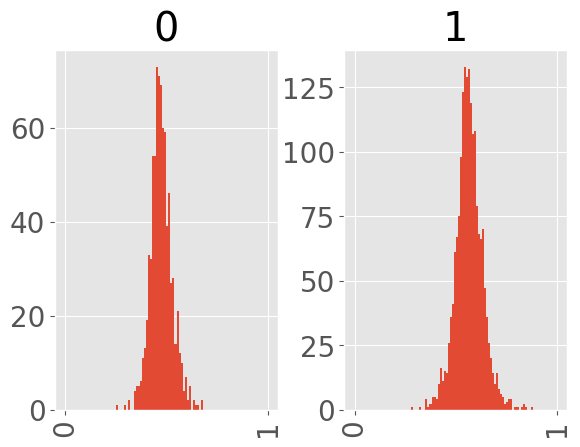

In [19]:
# Analysis of image derived image biomarker (CTR) by class + histograms of values
print(df_master_cleaned.loc[:, ['CTR']].describe())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['CTR']].describe())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['CTR']].describe())

df_master_cleaned.hist(column = 'CTR', bins=100, by='Cardiomegaly', range =[0,1])

              CPAR
count  2588.000000
mean      0.419645
std       0.114604
min       0.155824
25%       0.335245
50%       0.407548
75%       0.490510
max       0.968528
              CPAR
count  1803.000000
mean      0.459121
std       0.108310
min       0.194550
25%       0.386811
50%       0.447974
75%       0.520042
max       0.968528
             CPAR
count  785.000000
mean     0.328978
std      0.067533
min      0.155824
25%      0.283965
50%      0.320178
75%      0.364737
max      0.623267


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

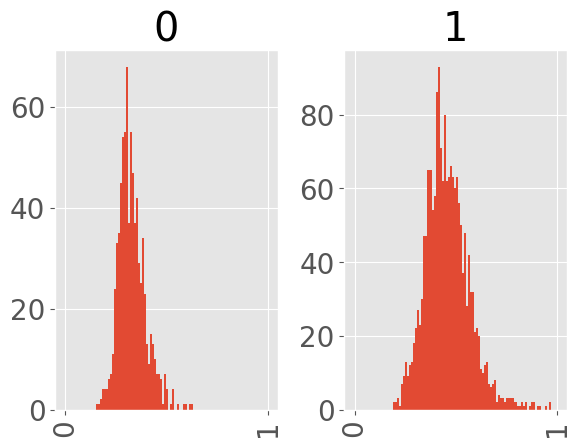

In [20]:
# Analysis of image derived image biomarker (CPAR) by class + histograms of values
print(df_master_cleaned.loc[:, ['CPAR']].describe())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 1, ['CPAR']].describe())
print(df_master_cleaned.loc[df_master_cleaned.Cardiomegaly == 0, ['CPAR']].describe())

df_master_cleaned.hist(column = 'CPAR', bins=100, by='Cardiomegaly', range =[0,1])

In [21]:
# Additional analysis of CTR and CPAR success rates
df_ctr = pd.read_csv(ctr_path)
df_cpar = pd.read_csv(cpar_path)

ctr_heart = (df_ctr.CTR == 2).sum()
ctr_lungs = (df_ctr.CTR == 3).sum()
ctr_both = (df_ctr.CTR == 4).sum()
ctr = ctr_both+ctr_heart+ctr_lungs

cpar_heart = (df_cpar.CPAR == 2).sum()
cpar_lungs = (df_cpar.CPAR == 3).sum()
cpar_both = (df_cpar.CPAR == 4).sum()
cpar = cpar_both+cpar_heart+cpar_lungs

print(f'CTR general success rate: {round((len(df_ctr)-ctr)/len(df_ctr)*100,3)}% (total of {ctr} errors)')
print(f'\t of which are {ctr_heart} are heart based ({round(ctr_heart/ctr*100,3)}%)')
print(f'\t of which are {ctr_lungs} are lung based ({round(ctr_lungs/ctr*100,3)}%)')
print(f'\t of which are {ctr_both} are both based ({round(ctr_both/ctr*100,3)}%)\n')

print(f'CPAR general success rate: {round((len(df_cpar)-cpar)/len(df_cpar)*100,3)}% (total of {cpar} errors)')
print(f'\t of which are {cpar_heart} are heart based ({round(cpar_heart/cpar*100,3)}%)')
print(f'\t of which are {cpar_lungs} are lung based ({round(cpar_lungs/cpar*100,3)}%)')
print(f'\t of which are {cpar_both} are both based ({round(cpar_both/cpar*100,3)}%)')

CTR general success rate: 99.004% (total of 958 errors)
	 of which are 817 are heart based (85.282%)
	 of which are 80 are lung based (8.351%)
	 of which are 61 are both based (6.367%)

CPAR general success rate: 97.627% (total of 2282 errors)
	 of which are 2057 are heart based (90.14%)
	 of which are 71 are lung based (3.111%)
	 of which are 154 are both based (6.748%)
